In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# 1. Load the Titanic dataset

data = pd.read_csv('titanic.csv')
print("Initial Data Preview:")
print(data.head())

Initial Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [4]:
# 2. Data Cleaning & Preprocessing

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values: use median for 'Age' and mode for 'Embarked'
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to dummy variables (drop_first avoids the dummy variable trap)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
print("Data after cleaning:")
print(data.head())

Data after cleaning:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


<ipython-input-4-79ab31550c72>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-4-79ab31550c72>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [5]:
# 3. Select Features and Target Variable

X = data.drop('Survived', axis=1)  # Independent features
y = data['Survived']               # Dependent target

In [6]:
# 4. Split the Data into Training and Test Sets (80/20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 5. Build and Train a Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# 6. Determine Feature Importances
# -------------------------------
importances = rf.feature_importances_
features = X.columns
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importances from Random Forest:")
print(feat_importance)


Feature Importances from Random Forest:
      Feature  Importance
5    Sex_male    0.273316
4        Fare    0.272058
1         Age    0.252745
0      Pclass    0.078616
2       SibSp    0.052192
3       Parch    0.038490
7  Embarked_S    0.023095
6  Embarked_Q    0.009488


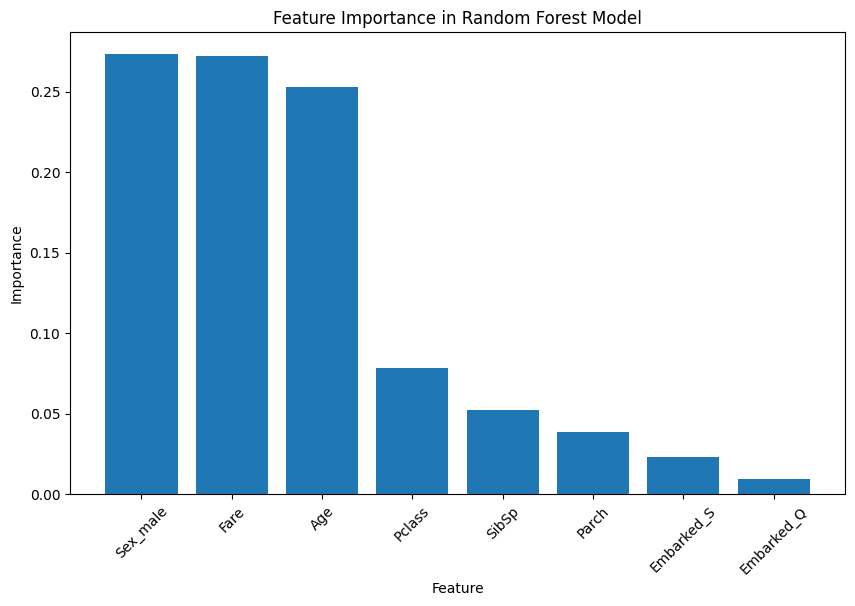

In [9]:
# Optional: Plot feature importances for visualization
plt.figure(figsize=(10,6))
plt.bar(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45)
plt.show()


In [10]:
# 7. Tune the Model Parameters using GridSearchCV

# Define parameter grid for n_estimators and max_depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15]
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [11]:
# 8. Report the Accuracy of All Models from the Grid Search

results = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Results:")
print(results[['params', 'mean_test_score']])

Grid Search Results:
                                      params  mean_test_score
0    {'max_depth': None, 'n_estimators': 50}         0.804836
1   {'max_depth': None, 'n_estimators': 100}         0.794987
2   {'max_depth': None, 'n_estimators': 200}         0.797813
3       {'max_depth': 5, 'n_estimators': 50}         0.820191
4      {'max_depth': 5, 'n_estimators': 100}         0.835645
5      {'max_depth': 5, 'n_estimators': 200}         0.825795
6      {'max_depth': 10, 'n_estimators': 50}         0.824456
7     {'max_depth': 10, 'n_estimators': 100}         0.825825
8     {'max_depth': 10, 'n_estimators': 200}         0.823018
9      {'max_depth': 15, 'n_estimators': 50}         0.807643
10    {'max_depth': 15, 'n_estimators': 100}         0.807633
11    {'max_depth': 15, 'n_estimators': 200}         0.802029


In [12]:
# 9. Identify the Best Model and Its Parameters

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Model Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Model Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8356446370530877


In [13]:
# 10. Evaluate the Best Model on the Test Set

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy of the Best Model:", test_accuracy)

Test Set Accuracy of the Best Model: 0.8156424581005587
